<a href="https://colab.research.google.com/github/abbyaguilar/cpsc483/blob/main/lab2_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# imports for the tutorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### <img src="https://img.icons8.com/dusk/64/000000/classroom.png" style="height:50px;display:inline"> Example - House Price Model
---
Given the following dataset:

| <center>Square Feet (X)</center> | <center>House Price in \$1000 (y)</center> |
| --- | --- |
|<center> 1400 </center>| <center> 245 </center>|
|<center> 1600 </center>| <center> 312 </center>|
|<center> 1700 </center>| <center> 279 </center>|
|<center> 1875 </center>| <center> 308 </center>|
|<center> 1100 </center>| <center> 199 </center>|
|<center> 1550 </center>| <center> 219 </center>|
|<center> 2350 </center>| <center> 405 </center>|
|<center> 2450 </center>| <center> 324 </center>|
|<center> 1425 </center>| <center> 319 </center>|
|<center> 1700 </center>| <center> 255 </center>|

* We wish to predict the price of a house given its size
* More formally:
    * Given a house of size $x$, what is the price $y=f(x)$ of the house?

In [6]:
def plot_possible_approx():
    x = [1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700]
    y = [245, 312, 279, 308, 199, 219, 405, 324, 319, 255]
    ap_x_1 = [1100, 2350]
    ap_y_1 = [219, 405]
    ap_x_2 = [1400, 1425, 1550, 1875, 2500]
    ap_y_2 = [245, 310, 219, 308, 360]
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(111)
    ax.scatter(x, y, label="original data", color='b')
    ax.plot(ap_x_1, ap_y_1, label='approximation 1', color='k')
    ax.plot(ap_x_2, ap_y_2, label='approximation 2', color='r')
    ax.set_xlabel("Square Feet")
    ax.set_ylabel("House Price in $1000")
    ax.set_title("House Price vs. House Size")
    ax.grid()
    ax.legend()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

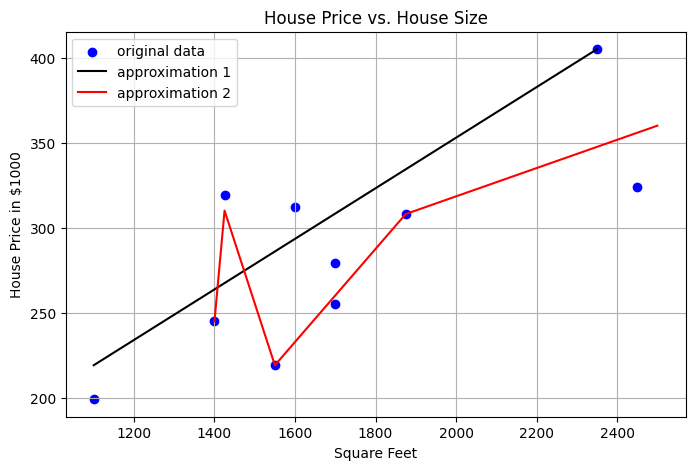

In [7]:
# let's plot the dataset
plot_possible_approx()

* Which function $y=f(x)$ to choose?
* Assuming a **linear** connection between dependent and independent variables **limits** the search space (constraining the problem).

## <img src="https://img.icons8.com/dusk/64/000000/line.png" style="height:50px;display:inline"> Linear Regression
---
A linear model makes a prediction by computing a weighted sum of the input features, plus a constant called the *bias term* (also called *intercept* sometimes).

We denote:
* $\hat{y}$ - the predicted value
* $n$ - number of features
* $x_i$ is the $i^{th}$ feature value
* $\theta_j$ is the $j^{th}$ model parameter, where $\theta_0$ is the bias weight ($\theta_0 \cdot 1$)

The *Linear Regression* model prediction: $$ \hat{y} = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n $$
In *vector* form: $$ \hat{y}=h_{\theta} (x) =\theta^T \cdot x $$

### <img src="https://img.icons8.com/bubbles/100/000000/home.png" style="height:50px;display:inline">  Example Cont. - A Linear Model for the House Prices
---
* One independent variable (house size) which "explains" the dependent variable (house price)

<img src="./assets/tut_08_lr_1.jpg" style="height:200px">

<img src="./assets/tut_08_lr_2.jpg" style="height:200px">

* **Estimated Regression Model**:
    * The sample regression line provides an estimate of the population regression line ($\hat{y} = \mathbb{E}(y)$)

<img src="./assets/tut_08_lr_3.jpg" style="height:200px">

* **Linear Regression Assumptions**:
    * The underlying relationship between the $x$ variable and the $y$ variable is *linear*
    * Error values $\epsilon$ are statistically independent
    * The probabiity distribution of the errors is *normal* and independent of $x$ with mean 0 and an equal but *unknown* variance for all values of $x$: $p(\epsilon) = \mathcal{N}(0, \sigma^2)$

In [8]:
def plot_lls_sol(x, y, theta_ls):
    x_with_bias = np.concatenate([x, np.ones(x.shape)], axis=1)
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(111)
    ax.scatter(x, y, label="original data", color='b')
    ax.plot(x, x_with_bias @ theta_ls, label='least-square solution', color='r')
    ax.set_xlabel("Square Feet")
    ax.set_ylabel("House Price in $1000")
    ax.set_title("House Price vs. House Size")
    ax.grid()
    ax.legend()

In [15]:
# solve the regression problem for the house price example


x = [1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700]
y = [245, 312, 279, 308, 199, 219, 405, 324, 319, 255]
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
x_with_bias = np.concatenate([x, np.ones_like(x)], axis=1)
theta_ls = np.linalg.inv(x_with_bias.T @ x_with_bias) @ x_with_bias.T @ y  # least-squares solution
print("learned parameters:")
print(theta_ls)
print("y_hat = {:.3f}x + {:3f} (square feet)".format(theta_ls[0][0], theta_ls[1][0]))

learned parameters:
[[ 0.10976774]
 [98.24832962]]
y_hat = 0.110x + 98.248330 (square feet)


In [13]:
# imports for the tutorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<IPython.core.display.Javascript object>

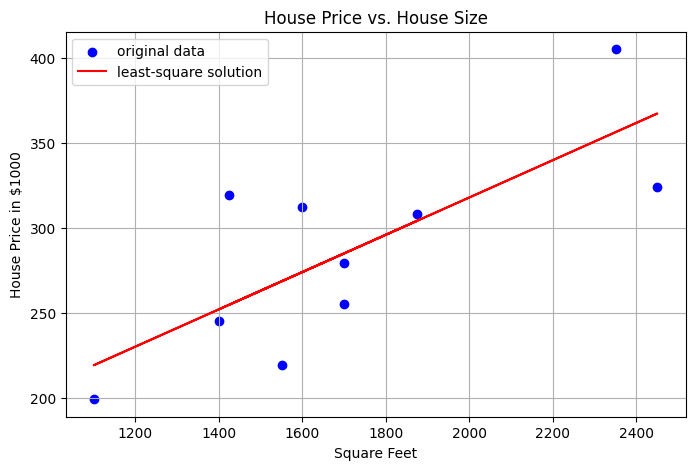

In [14]:
# plot
plot_lls_sol(x, y, theta_ls)

### <img src="https://img.icons8.com/dusk/64/000000/timer.png" style="height:50px;display:inline"> Residual Analysis
---
* Purposes
    * Examine for **linearity assumption**

<img src="./assets/tut_08_res_1.jpg" style="height:200px">

* Examine for constant variance for all levels of x

<img src="./assets/tut_08_res_2.jpg" style="height:200px">

* Evaluate normal distribution assumption

 * Graphical Analysis of Residuals
    * Can plot residuals vs. x
    * Can create histogram of residuals to check for normality

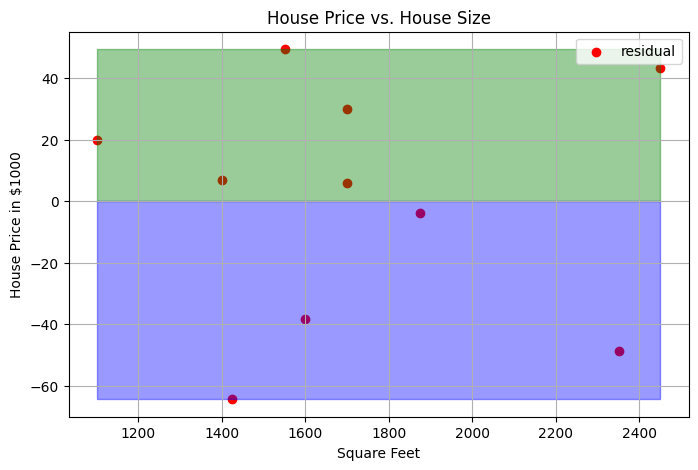

In [16]:
residuals = x_with_bias @ theta_ls - y
# plot
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.scatter(x, residuals, label='residual', color='r')
ax.fill_between(np.sort(x.reshape(-1,)), np.max(residuals), alpha=0.4, color="g")
ax.fill_between(np.sort(x.reshape(-1,)), np.min(residuals), alpha=0.4, color="b")
ax.set_xlabel("Square Feet")
ax.set_ylabel("House Price in $1000")
ax.set_title("House Price vs. House Size")
ax.grid()
ax.legend()

### <img src="https://img.icons8.com/doodle/96/000000/close-sign.png" style="height:50px;display:inline"> Closed-Form Leaset-Squares Solution
---
To find the value of $\theta$ that minimizes the cost function, there is a *closed-form solution* - a mathemtical equation that gives the result directly. It is also called the **Normal Equation**. We will now derive it.

* We wish to find a solution for $\hat{y} = X \theta$
* The parameters $\theta$ are obtained by minimzing the *sum of squared* errors or residuals (SSE): $$ SSE(\theta) = \sum_{i=1}^n (\theta^T x_i - y_i)^2 = ||X \theta -y ||_2^2 = (X\theta -y)^T(X\theta - y) = \theta^TX^TX\theta -\theta^TX^Ty - y^TX\theta +y^Ty$$
* Minimizing w.r.t to $\theta$: $$\nabla_{\theta}SSE(\theta) = 2X^TX\theta - 2X^Ty = 0 \rightarrow \theta^{*} = (X^TX)^{-1}X^Ty $$
* The matrix $(X^TX)^{-1}X^T$ is the *Pseudo Inverse* of $X$

### <img src="https://img.icons8.com/dusk/64/000000/double-down.png" style="height:50px;display:inline"> Gradient Descent Solution
---
Iterative solution, as we have seen in tutorial 7

#### <img src="https://img.icons8.com/dusk/64/000000/waypoint-map.png" style="height:30px;display:inline">Stochastic Gradient Descent (Mini-Batch Gradient Descent)
---
* **Pseudocode**:
    * **Require**: Learning rate $\alpha_k$
    * **Require**: Initial parameter $w$
    * **While** stopping criterion not met **do**
        * Sample a minibatch of $m$ examples from the training set ($m=1$ for SGD)
        * Set $\tilde{X} = [x_1,...,x_m] $ with corresponding targets $\tilde{Y} = [y_1,...,y_m]$
        * Compute gradient: $g \leftarrow 2\tilde{X}^T\tilde{X}w - 2\tilde{X}^T \tilde{Y}$
        * Apply update: $w \leftarrow w - \alpha_k g$
        * $k \leftarrow k + 1$
    * **end while**

### <img src="https://img.icons8.com/dusk/64/000000/graph.png" style="height:50px;display:inline"> Basis Function Expansion
---
* What if the data is actually more complex than a simple linear line? But your data has just one feature per sample.
* Linear Regression can be made to model **non-linear** relationships by replacing $x$ with some non-linear functions of the inputs $\phi(x)$: $$ y = \theta_0 + \theta \phi(x) + \epsilon $$ This is also called **feature extraction**.
* The model is **still linear** in the parameters $\theta$ - it is still called *linear regression*.

### <img src="https://img.icons8.com/nolan/64/000000/fit-to-width.png" style="height:50px;display:inline"> Example - Polynomial Fitting (Polynomial Regression)
---
* Given $L$ measurements $\{x_k, y_k\}_{k=1}^L$ originating from the $n^{th}$ degree polynomial with additive white Gaussian noise $ y= h(x) + \epsilon$ where: $h(x)=\sum_{i=0}^n \theta_ix^i$ and $\epsilon \sim \mathcal{N}(0, \sigma^2)$ i.i.d
* **Goal**: find the coefficients $\{\theta_i\}_{i=0}^n$ to best fit the polynomial $h(x)$
* For each measurement $(x_k,y_k)$ we will fit the following model: $$ y_k = \theta_0 x_k^0 + \theta_1 x_k^1 + \theta_2 x_k^2 +... + \theta_n x_k^n , \forall k = 1,2,...,L$$

<img src="./assets/tut_08_poly_1.jpg" style="height:300px">


* **The Loss Function**: the optimization goal is to minimize the mean squared error $$ f_{\theta}(x) = \sum_{k=1}^L (y_k - (\theta_0 x_k^0 + \theta_1 x_k^1 + \theta_2 x_k^2 +... + \theta_n x_k^n))^2 $$
* Denote: $$ \Phi(X) = \begin{bmatrix}
  x_1^0 & \cdots & x_1^n \\
  \vdots & \vdots & \vdots \\
  x_L^0 & \cdots & x_L^n
 \end{bmatrix}, \theta = \begin{bmatrix}
  \theta_0 \\
  \vdots \\
  \theta_n
 \end{bmatrix}, y =  \begin{bmatrix}
  y_1 \\
  \vdots \\
  y_L
 \end{bmatrix}$$
* **The Least-Squares Solution**: $$ \theta^{*} = (\Phi(X)^T\Phi(X))^{-1}\Phi(X)^Ty $$
* Example: we will fit $y=0.5x^2 + x + 2 + \epsilon$

In [17]:
# let's try this
L = 100 # num of samples
X = np.sort(6 * np.random.rand(L, 1) - 3, axis=0)
epsilon = np.random.randn(L , 1)
y = 0.5 * X**2 + X + 2 + epsilon

Text(0.5, 1.0, 'y = 0.5*x^2 + x + 2 + epsilon')

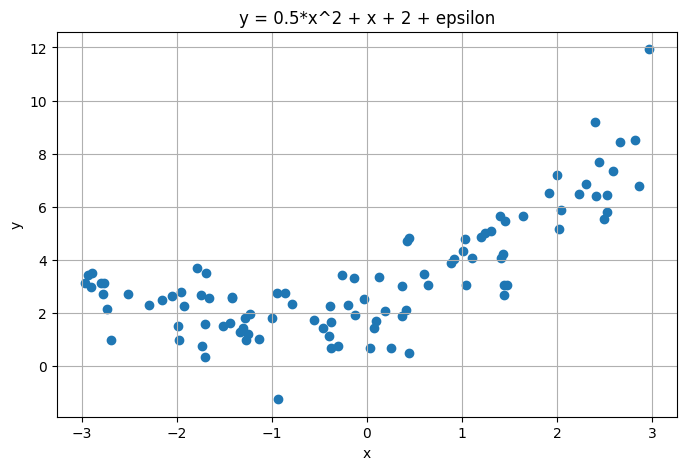

In [18]:
# let's see it
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.scatter(X, y)
ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("y = 0.5*x^2 + x + 2 + epsilon")

In [19]:
def plot_poly_lls(X, y, phi_x, theta_ls, title=""):
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(111)
    ax.scatter(X, y, label="original")
    ax.plot(X, phi_x @ theta_ls, label="least-squares solution", color='r')
    ax.grid()
    ax.legend()
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(title)

In [32]:
# 2 ways - manually or using scikit-learn
# manually
degree = 2
phi_x = np.concatenate([X**i for i in range(degree + 1)], axis=1)  # Feature extraction
print(X**degree)
print(phi_x)
theta_ls = np.linalg.inv(phi_x.T @ phi_x) @ phi_x.T @ y
print("theta:")
print(theta_ls)

[[8.77909412e+00]
 [8.61055932e+00]
 [8.43885742e+00]
 [8.35280678e+00]
 [7.81674303e+00]
 [7.70164814e+00]
 [7.66645674e+00]
 [7.46786257e+00]
 [7.26382605e+00]
 [6.31896665e+00]
 [5.26955812e+00]
 [4.66171073e+00]
 [4.19397124e+00]
 [3.96013696e+00]
 [3.90048451e+00]
 [3.82032542e+00]
 [3.69038582e+00]
 [3.19118351e+00]
 [3.03520792e+00]
 [2.99117805e+00]
 [2.90971631e+00]
 [2.88858917e+00]
 [2.85134502e+00]
 [2.76860131e+00]
 [2.27775884e+00]
 [2.07997260e+00]
 [2.00304803e+00]
 [2.00195254e+00]
 [1.77241113e+00]
 [1.69711140e+00]
 [1.64707049e+00]
 [1.62675171e+00]
 [1.55419272e+00]
 [1.51275386e+00]
 [1.27899026e+00]
 [9.95048632e-01]
 [8.91362078e-01]
 [8.65198164e-01]
 [7.48423495e-01]
 [6.15223217e-01]
 [3.14127382e-01]
 [2.14512803e-01]
 [1.57748178e-01]
 [1.52105988e-01]
 [1.43571938e-01]
 [1.42144563e-01]
 [9.57248904e-02]
 [6.65291513e-02]
 [3.77721817e-02]
 [1.76410558e-02]
 [1.68127046e-02]
 [9.65281843e-04]
 [1.22552287e-03]
 [5.27497388e-03]
 [9.70721015e-03]
 [1.573873

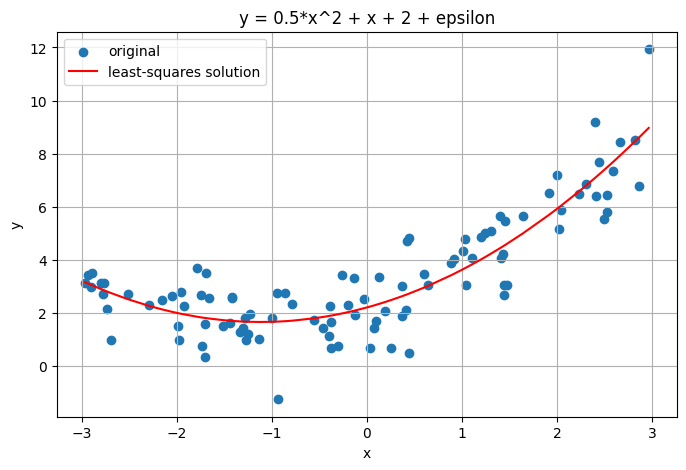

In [33]:
# plot
plot_poly_lls(X, y, phi_x, theta_ls, title="y = 0.5*x^2 + x + 2 + epsilon")

In [41]:
# using scikit-learn
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=True)
phi_x = poly_features.fit_transform(X)
print(phi_x.shape)
# continue the same
theta_ls = np.linalg.inv(phi_x.T @ phi_x) @ phi_x.T @ y
print("theta:")
print(theta_ls)

(100, 3)
theta:
[[2.19436594]
 [0.98249666]
 [0.4400699 ]]


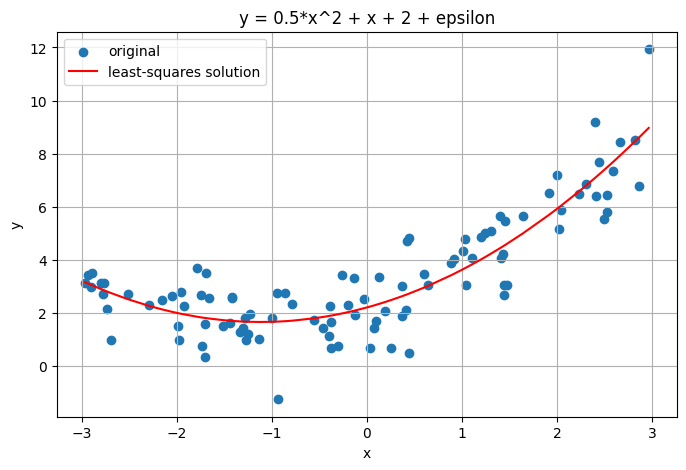

In [42]:
# plot
plot_poly_lls(X, y, phi_x, theta_ls, title="y = 0.5*x^2 + x + 2 + epsilon")

### <img src="https://img.icons8.com/nolan/64/000000/fit-to-width.png" style="height:50px;display:inline"> Example - Cosine Fitting
---
* Given $L$ measurements $\{x_k, y_k\}_{k=1}^L$ originating from the sinusoidal signal $h(x)$ with additive white Gaussian noise $ y= h(x) + \epsilon$ where: $h(x)=A\cos(2\pi f_0x_k + \psi)$ and $\epsilon \sim \mathcal{N}(0, \sigma^2)$ i.i.d and the frequency $f_0$ is given.
* **Goal**: find the amplitude $A$ and the phase $\psi$

<img src="./assets/tut_08_cos.jpg" style="height:300px">

* **The Loss Function**: the optimization goal is to minimize the mean squared error $$ f_{\theta}(x) = \sum_{k=1}^L (y_k - A\cos(2\pi f_0x_k + \psi))^2 $$
    * The problem is not linear, not even in parameters
    * We will use the following trigonometric identity: $$ \cos(\alpha +\beta) = \cos(\alpha)\cos(\beta) - \sin(\alpha)\sin(\beta) \rightarrow A\cos(2\pi f_0x_k + \psi) = A\cos(\psi)\cos(2\pi f_0 x_k) - A\sin(\psi)sin(2\pi f_0 x_k) $$
    * We will also use the following transformation from polar coordinates: $$ \theta_1 = A \cos(\psi) $$ $$ \theta_2 = A \sin(\psi) $$
    * This yields: $$ f_{\theta}(x) = \sum_{k=1}^L (y_k - (\theta_1 \cos(2\pi f_0x_k) - \theta_2 \sin(2\pi f_0x_k)))^2 $$
        * The problem is now linear!


    
* Denote: $$ \Phi(X) = \begin{bmatrix}
  \cos(2\pi f_0 x_1) & -\sin(2\pi f_0 x_1) \\
  \vdots & \vdots \\
  \cos(2\pi f_0 x_L) & -\sin(2\pi f_0 x_L)
 \end{bmatrix}, \theta = \begin{bmatrix}
  \theta_1 \\
  \theta_2
 \end{bmatrix}, y =  \begin{bmatrix}
  y_1 \\
  \vdots \\
  y_L
 \end{bmatrix}$$
* **The Least-Squares Solution**: $$ \theta^{*} = (\Phi(X)^T\Phi(X))^{-1}\Phi(X)^Ty $$
* Finally: $$ A = \sqrt{\theta_1^2 +\theta_2^2} $$ $$ \psi = \arctan\frac{\theta_2}{\theta_1} $$
* Example: we will fit $y=10\cos(2\pi \cdot 0.8 \cdot x + \frac{\pi}{3}) +\epsilon$

In [43]:
L = 100 # num of samples
x = np.sort(6 * np.random.rand(L, 1) - 3, axis=0)
epsilon = np.random.randn(L , 1)
f_0 = 0.8
psi = np.pi / 3
A = 10
y = A * np.cos(2 * np.pi * f_0 * x + psi) + epsilon

Text(0.5, 1.0, 'y = 10cos(2*pi*0.8*x + pi/3 ) + epsilon')

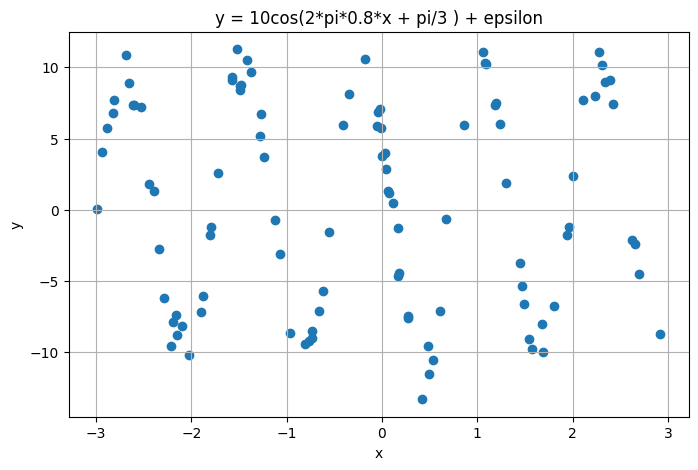

In [44]:
# let's see it
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.scatter(x, y)
ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("y = 10cos(2*pi*0.8*x + pi/3 ) + epsilon")

In [45]:
def plot_cos_lls_sol(x, y, y_pred):
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(111)
    ax.scatter(x, y, label="original")
    ax.plot(x, y_pred, label="least-squares solution", color='r')
    ax.grid()
    ax.legend()
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("y = 10cos(2*pi*0.8*x + pi/3 ) + epsilon")

In [47]:
phi_x = np.concatenate([np.cos(2 * np.pi * f_0 * x), -np.sin(2 * np.pi * f_0 * x)], axis=1)
print(phi_x.shape)
theta_ls = np.linalg.inv(phi_x.T @ phi_x) @ phi_x.T @ y
print("theta:")
print(theta_ls)
A_pred = np.sqrt(np.sum(np.square(theta_ls)))
psi_pred = np.arctan(theta_ls[1] / theta_ls[0])
y_pred = A_pred * np.cos(2 * np.pi * f_0 * x + psi_pred)

(100, 2)
theta:
[[5.02762272]
 [8.72466976]]


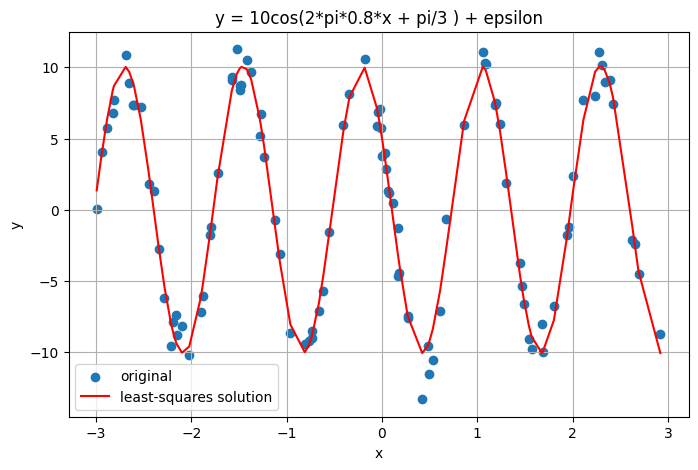

In [48]:
# let's see it
plot_cos_lls_sol(x, y, y_pred)